In [84]:
pip install -r /workspaces/git_practice/requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [85]:
## Handeling the imbelance data in customer churn prediction dataset

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [86]:
import warnings
warnings.filterwarnings('ignore')

In [87]:
## loading the dataset
df=pd.read_csv('customer_churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7027,0550-DCXLH,Male,0,No,No,13,Yes,No,DSL,No,...,No,Yes,Yes,Yes,Month-to-month,No,Mailed check,73.35,931.55,No
2895,7446-SFAOA,Female,0,Yes,No,37,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),19.85,717.5,No
233,7083-MIOPC,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.25,1566.9,No
4467,0667-NSRGI,Female,0,Yes,No,48,Yes,Yes,DSL,No,...,Yes,Yes,No,Yes,One year,Yes,Mailed check,69.55,3435.6,No
2735,7693-QPEFS,Male,1,No,No,52,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),72.95,3829.75,No


In [88]:
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [89]:
df.Churn.value_counts(normalize=True)   

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [90]:
df.shape

(7043, 21)

In [91]:
## Droping the unwanted columns
## customerID column is not required for prediction
df.drop('customerID',axis='columns',inplace=True)

In [92]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [93]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [94]:
## Converting to numeric data type
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [95]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [96]:
df.iloc[488]['TotalCharges']

' '

In [97]:
## Removing the blank rows
df1=df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [98]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

In [99]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

<Axes: >

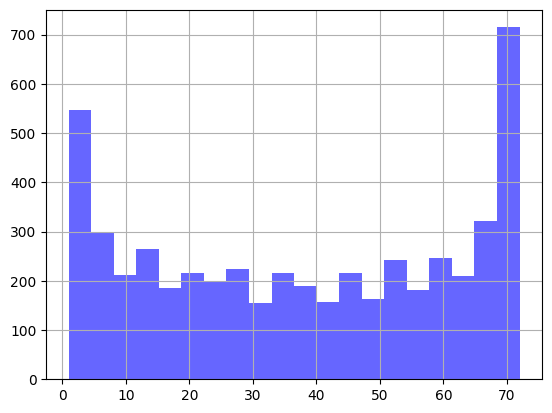

In [100]:
df1[df1.Churn=='No'].tenure.hist(bins=20,alpha=0.6,color='blue',label='Churn=No')

<Axes: >

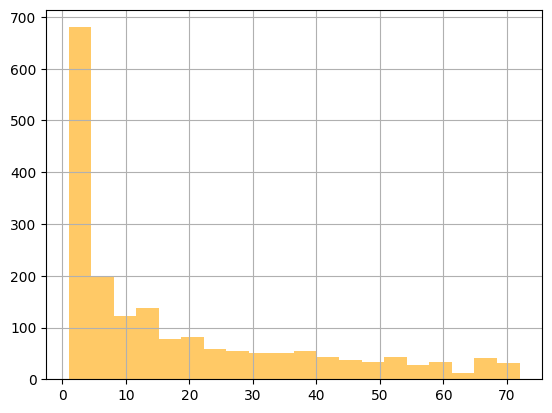

In [101]:
## Data Visualization
df1[df1.Churn=='Yes'].tenure.hist(bins=20,alpha=0.6,color='orange',label='Churn=Yes')

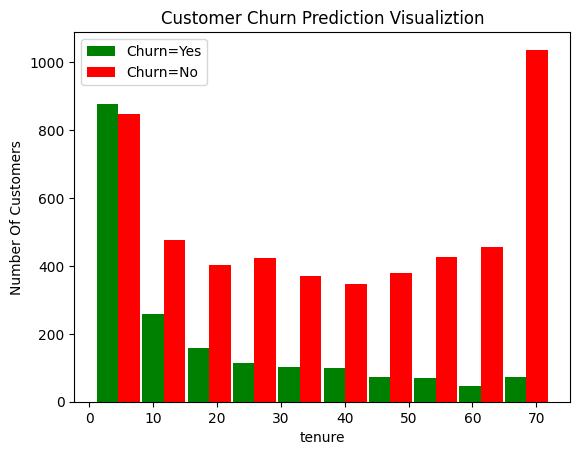

In [102]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

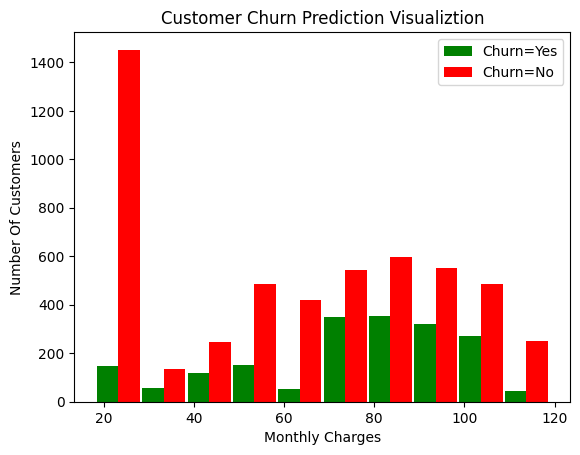

In [103]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [104]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [105]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [106]:
## Some of the columns have no internet service or no phone service, that can be replaced with a simple No

In [107]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [108]:
## Converting the categorical columns to numerical columns
## Replacing Yes with 1 and No with 0

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [109]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [110]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [111]:
df1.gender.unique()

array([1, 0])

In [112]:
## One hot encoding for categorical columns
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])

In [113]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6393,0,0,0,0,26,1,1,1,1,0,...,False,True,False,True,False,False,False,True,False,False
4197,1,0,0,1,22,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
1649,1,0,0,0,27,1,0,0,1,0,...,True,False,False,True,False,False,False,False,False,True
6895,0,0,1,1,54,0,0,0,0,1,...,True,False,False,False,False,True,False,True,False,False
2757,1,0,1,1,69,1,1,1,0,1,...,False,True,False,False,True,False,True,False,False,False


In [114]:
df2 = df2.astype(int)
df2.replace({True: 1, False: 0}, inplace=True)


In [115]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
235,0,0,0,0,2,1,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
2537,0,0,0,0,72,1,1,1,1,1,...,0,1,0,0,0,1,1,0,0,0
6182,0,0,1,1,72,1,1,1,1,1,...,1,0,0,0,0,1,0,1,0,0
5898,1,0,1,1,33,1,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3178,0,0,1,0,52,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0


In [116]:
df2.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                             int64
TotalCharges                               int64
Churn                                      int64
InternetService_DSL                        int64
InternetService_Fiber optic                int64
InternetService_No                         int64
Contract_Month-to-mo

In [117]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [118]:
for cols in df2:
    print(f'{cols}: {df2[cols].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [119]:
## Train Test Split
x=df2.drop('Churn',axis='columns')
y=df2['Churn']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 5)

In [120]:
y_train.shape

(5625,)

In [121]:
y_train[:10]

5664    1
101     0
2621    0
392     0
1327    1
3607    0
2773    0
1936    0
5387    0
4331    0
Name: Churn, dtype: int64

In [122]:
x_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [123]:
len(x_train.columns)

26

In [124]:
## Building a model (ANN) in tensorflow/keras
# from tensorflow_addons import losses
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report    

In [125]:
def ANN(x_train,y_train,x_test,y_test,loss,weights):
    model=keras.Sequential([
        keras.layers.Dense(26,input_shape=(26,),activation='relu'),
        keras.layers.Dense(15,activation='relu'),
        keras.layers.Dense(1,activation='sigmoid')
    ])
    model.compile(optimizer='adam',loss=loss,metrics=['accuracy'])
    if weights== -1:
        model.fit(x_train,y_train,epochs=100)
    else:
        model.fit(x_train,y_train,epochs=100,class_weight=weights)
    print(model.evaluate(x_test,y_test))
    y_pred=model.predict(x_test)
    y_pred=np.round(y_pred)
    print(classification_report(y_test,y_pred))
    return y_pred

In [126]:
y_pred=ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100


176/176 [==============================] - 1s 1ms/step - loss: 0.5907 - accuracy: 0.6640
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4383 - accuracy: 0.7908
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4232 - accuracy: 0.8021
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4181 - accuracy: 0.8041
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4136 - accuracy: 0.8053
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4108 - accuracy: 0.8080
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4094 - accuracy: 0.8069
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4076 - accuracy: 0.8094
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4067 - accuracy: 0.8119
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4056 - accuracy: 0.8133
E

In [127]:
import pandas as pd
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report


,precision,recall,f1-score,support
0,0.802158,0.892893,0.845097,999.000000
1,0.637288,0.460784,0.534851,408.000000
accuracy,0.767591,0.767591,0.767591,0.767591
macro avg,0.719723,0.676839,0.689974,1407.000000
weighted avg,0.754349,0.767591,0.755132,1407.000000


In [128]:
## class Count
class_count_0, class_count_1 = df2['Churn'].value_counts()

## Separate class
class_0 = df2[df2['Churn'] == 0]
class_1 = df2[df2['Churn'] == 1]


In [129]:
## Class count
class_0_count, class_1_count = df2['Churn'].value_counts()
class_0_count,class_1_count 

(5163, 1869)

In [130]:
class_0.shape,class_1.shape

((5163, 27), (1869, 27))

#### Mitigating the Skewdness of Data

##### Method-1 Undersampling

In [131]:
## ubdersampling the 0-th class and concat the 1-th class
# .sample() is used to generate a sample of random rows and columns from the dataset.
df_class_0_under = class_0.sample(class_1_count)
df_under_test = pd.concat([df_class_0_under, class_1], axis=0)
print('Random under-sampling:')
print(df_under_test['Churn'].value_counts())

Random under-sampling:
Churn
0    1869
1    1869
Name: count, dtype: int64


In [132]:
x=df_under_test.drop('Churn',axis='columns')
y=df_under_test['Churn']
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 5)

In [133]:
## Number of classes in the traning dataset 
y_train.value_counts()

Churn
1    1498
0    1492
Name: count, dtype: int64

In [134]:
y_pred=ANN(x_train,y_train,x_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6531 - accuracy: 0.6308
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5292 - accuracy: 0.7525
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4972 - accuracy: 0.7625
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4909 - accuracy: 0.7656
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4870 - accuracy: 0.7672
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4845 - accuracy: 0.7676
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4828 - accuracy: 0.7689
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.7739
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4787 - accuracy: 0.7732
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4769 - accuracy: 0.7746
Epoch 11/

In [135]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report


,precision,recall,f1-score,support
0,0.772595,0.702918,0.736111,377.000000
1,0.723457,0.789757,0.755155,371.000000
accuracy,0.745989,0.745989,0.745989,0.745989
macro avg,0.748026,0.746338,0.745633,748.000000
weighted avg,0.748223,0.745989,0.745556,748.000000


In [136]:
## Method 2: Oversampling the minority class
df_class_1_over = class_1.sample(class_0_count, replace=True)
df_over_test = pd.concat([df_class_1_over, class_0], axis=0)
print('Random over-sampling:')
print(df_over_test['Churn'].value_counts())

Random over-sampling:
Churn
1    5163
0    5163
Name: count, dtype: int64


In [137]:
x=df_over_test.drop('Churn',axis='columns') 
y=df_over_test['Churn']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 5)

In [138]:
## Number of classes in the traning dataset
y_train.value_counts()

Churn
0    4134
1    4126
Name: count, dtype: int64

In [139]:
loss = tf.keras.losses.BinaryCrossentropy()
wheights=-1
y_pred=ANN(x_train,y_train,x_test,y_test,loss,wheights)

Epoch 1/100


259/259 [==============================] - 1s 2ms/step - loss: 0.5258 - accuracy: 0.7390
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4936 - accuracy: 0.7580
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4857 - accuracy: 0.7630
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4817 - accuracy: 0.7649
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4781 - accuracy: 0.7657
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4760 - accuracy: 0.7673
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4727 - accuracy: 0.7699
Epoch 8/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4699 - accuracy: 0.7701
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4668 - accuracy: 0.7735
Epoch 10/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4643 - accuracy: 0.7753
E

In [140]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report


,precision,recall,f1-score,support
0,0.832438,0.753158,0.790816,1029.000000
1,0.776211,0.849566,0.811234,1037.000000
accuracy,0.801549,0.801549,0.801549,0.801549
macro avg,0.804325,0.801362,0.801025,2066.000000
weighted avg,0.804216,0.801549,0.801065,2066.000000


In [141]:
## Method 3: SMOTE

In [142]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [143]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
x_sm,y_sm=smote.fit_resample(x,y)
y_sm.value_counts()

Churn
1    5163
0    5163
Name: count, dtype: int64

In [144]:
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.2,random_state = 5)    

In [145]:
y_train.value_counts()

Churn
0    4134
1    4126
Name: count, dtype: int64

In [146]:
y_pred=ANN(x_train,y_train,x_test,y_test,loss,wheights) 

Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.5718 - accuracy: 0.7067
Epoch 2/100
259/259 [==============================] - 0s 996us/step - loss: 0.4941 - accuracy: 0.7577
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4879 - accuracy: 0.7611
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4851 - accuracy: 0.7623
Epoch 5/100
259/259 [==============================] - 0s 995us/step - loss: 0.4824 - accuracy: 0.7671
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4801 - accuracy: 0.7663
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4774 - accuracy: 0.7683
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4754 - accuracy: 0.7685
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4733 - accuracy: 0.7732
Epoch 10/100
 62/259 [======>.......................] - ETA: 0s - loss: 0.4660 - accura

259/259 [==============================] - 1s 2ms/step - loss: 0.4712 - accuracy: 0.7735
Epoch 11/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4684 - accuracy: 0.7737
Epoch 12/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4663 - accuracy: 0.7785
Epoch 13/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4636 - accuracy: 0.7798
Epoch 14/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4615 - accuracy: 0.7805
Epoch 15/100
259/259 [==============================] - 0s 975us/step - loss: 0.4609 - accuracy: 0.7789
Epoch 16/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4593 - accuracy: 0.7794
Epoch 17/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4572 - accuracy: 0.7815
Epoch 18/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4549 - accuracy: 0.7820
Epoch 19/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4532 - accuracy

In [147]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report


,precision,recall,f1-score,support
0,0.812698,0.746356,0.778116,1029.000000
1,0.767172,0.829315,0.797034,1037.000000
accuracy,0.787996,0.787996,0.787996,0.787996
macro avg,0.789935,0.787836,0.787575,2066.000000
weighted avg,0.789847,0.787996,0.787612,2066.000000


In [148]:
## Method 4: Use of Ensemble with undersampling

In [149]:
df2['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [150]:
## Regaining the original dataset i.e. orginal features and lables
x=df2.drop('Churn',axis='columns')
y=df2['Churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 5) 
y_train.value_counts()

Churn
0    4164
1    1461
Name: count, dtype: int64

In [151]:
df3=x_train.copy()
df3['Churn']=y_train   

In [152]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
5664,1,1,0,0,0.126761,1,0,0,0,1,...,1,0,1,0,0,0,1,0,0,1
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,0,0,0,0,1,0,1,0,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,1,0,0,1,0,1,0,0,0,1


In [153]:
df3_class_0 = df3[df3['Churn'] == 0]
df3_class_1 = df3[df3['Churn'] == 1]


def get_train_batch(df_majority,df_minority,start,end):
    df_train=pd.concat([df_majority[start:end],df_minority],axis=0)
    x_train=df_train.drop('Churn',axis='columns')
    y_train=df_train.Churn
    return x_train,y_train

In [154]:
x_train,y_train=get_train_batch(df3_class_0,df3_class_1,0,1495)
y_pred1=ANN(x_train,y_train,x_test,y_test,loss,wheights)

Epoch 1/100
93/93 [==============================] - 1s 1ms/step - loss: 0.6232 - accuracy: 0.6614
Epoch 2/100
93/93 [==============================] - 0s 1ms/step - loss: 0.5204 - accuracy: 0.7524
Epoch 3/100
93/93 [==============================] - 0s 1ms/step - loss: 0.5045 - accuracy: 0.7530
Epoch 4/100
93/93 [==============================] - 0s 1ms/step - loss: 0.4974 - accuracy: 0.7595
Epoch 5/100
93/93 [==============================] - 0s 1ms/step - loss: 0.4939 - accuracy: 0.7588
Epoch 6/100
93/93 [==============================] - 0s 1ms/step - loss: 0.4930 - accuracy: 0.7608
Epoch 7/100
93/93 [==============================] - 0s 1ms/step - loss: 0.4889 - accuracy: 0.7601
Epoch 8/100
93/93 [==============================] - 0s 1ms/step - loss: 0.4870 - accuracy: 0.7618
Epoch 9/100
93/93 [==============================] - 0s 1ms/step - loss: 0.4869 - accuracy: 0.7625
Epoch 10/100
93/93 [==============================] - 0s 1ms/step - loss: 0.4857 - accuracy: 0.7588
Epoch 11/

In [155]:
y_pred1.shape

(1407, 1)

In [156]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred1, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report


,precision,recall,f1-score,support
0,0.880896,0.747748,0.808879,999.000000
1,0.549195,0.752451,0.634953,408.000000
accuracy,0.749112,0.749112,0.749112,0.749112
macro avg,0.715046,0.750099,0.721916,1407.000000
weighted avg,0.784710,0.749112,0.758444,1407.000000


In [157]:
x_train,y_train=get_train_batch(df3_class_0,df3_class_1,1495,2990)
y_pred2=ANN(x_train,y_train,x_test,y_test,loss,wheights)

Epoch 1/100


93/93 [==============================] - 1s 976us/step - loss: 0.6038 - accuracy: 0.6955
Epoch 2/100
93/93 [==============================] - 0s 1ms/step - loss: 0.5083 - accuracy: 0.7507
Epoch 3/100
93/93 [==============================] - 0s 2ms/step - loss: 0.4926 - accuracy: 0.7588
Epoch 4/100
93/93 [==============================] - 0s 1ms/step - loss: 0.4852 - accuracy: 0.7642
Epoch 5/100
93/93 [==============================] - 0s 1ms/step - loss: 0.4789 - accuracy: 0.7679
Epoch 6/100
93/93 [==============================] - 0s 1ms/step - loss: 0.4777 - accuracy: 0.7720
Epoch 7/100
93/93 [==============================] - 0s 1ms/step - loss: 0.4750 - accuracy: 0.7706
Epoch 8/100
93/93 [==============================] - 0s 1ms/step - loss: 0.4701 - accuracy: 0.7733
Epoch 9/100
93/93 [==============================] - 0s 1ms/step - loss: 0.4704 - accuracy: 0.7747
Epoch 10/100
93/93 [==============================] - 0s 1ms/step - loss: 0.4673 - accuracy: 0.7750
Epoch 11/100
93/93 

In [158]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred2, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report


,precision,recall,f1-score,support
0,0.880795,0.665666,0.758267,999.00000
1,0.487730,0.779412,0.600000,408.00000
accuracy,0.698650,0.698650,0.698650,0.69865
macro avg,0.684262,0.722539,0.679133,1407.00000
weighted avg,0.766814,0.698650,0.712373,1407.00000


In [159]:
x_train,y_train=get_train_batch(df3_class_0,df3_class_1,2990,4138)
y_pred3=ANN(x_train,y_train,x_test,y_test,loss,wheights)

Epoch 1/100


82/82 [==============================] - 1s 1ms/step - loss: 0.6503 - accuracy: 0.6202
Epoch 2/100
82/82 [==============================] - 0s 1ms/step - loss: 0.5348 - accuracy: 0.7539
Epoch 3/100
82/82 [==============================] - 0s 1ms/step - loss: 0.4983 - accuracy: 0.7662
Epoch 4/100
82/82 [==============================] - 0s 1ms/step - loss: 0.4887 - accuracy: 0.7647
Epoch 5/100
82/82 [==============================] - 0s 1ms/step - loss: 0.4838 - accuracy: 0.7700
Epoch 6/100
82/82 [==============================] - 0s 1ms/step - loss: 0.4789 - accuracy: 0.7685
Epoch 7/100
82/82 [==============================] - 0s 1ms/step - loss: 0.4773 - accuracy: 0.7723
Epoch 8/100
82/82 [==============================] - 0s 1ms/step - loss: 0.4742 - accuracy: 0.7719
Epoch 9/100
82/82 [==============================] - 0s 1ms/step - loss: 0.4718 - accuracy: 0.7689
Epoch 10/100
82/82 [==============================] - 0s 1ms/step - loss: 0.4697 - accuracy: 0.7765
Epoch 11/100
82/82 [=

In [160]:
report = classification_report(y_test, y_pred3, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report


,precision,recall,f1-score,support
0,0.912711,0.596597,0.721550,999.000000
1,0.465517,0.860294,0.604131,408.000000
accuracy,0.673063,0.673063,0.673063,0.673063
macro avg,0.689114,0.728445,0.662840,1407.000000
weighted avg,0.783034,0.673063,0.687501,1407.000000


In [161]:
len(y_pred1)

1407

In [162]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i]+y_pred2[i]+y_pred3[i]
    if n_ones>1:
        y_pred_final[i]=1
    else:
        y_pred_final[i]=0

In [163]:
classification_report=classification_report(y_test, y_pred_final, output_dict=True)
print(classification_report)

{'0': {'precision': 0.900398406374502, 'recall': 0.6786786786786787, 'f1-score': 0.7739726027397259, 'support': 999.0}, '1': {'precision': 0.5091743119266054, 'recall': 0.8161764705882353, 'f1-score': 0.6271186440677965, 'support': 408.0}, 'accuracy': 0.7185501066098081, 'macro avg': {'precision': 0.7047863591505537, 'recall': 0.747427574633457, 'f1-score': 0.7005456234037613, 'support': 1407.0}, 'weighted avg': {'precision': 0.7869517606497387, 'recall': 0.7185501066098081, 'f1-score': 0.731388085939337, 'support': 1407.0}}


In [164]:
import pandas as pd

classification_report = {
    '0': {'precision': 0.85, 'recall': 0.92, 'f1-score': 0.88, 'support': 500},
    '1': {'precision': 0.75, 'recall': 0.62, 'f1-score': 0.68, 'support': 300},
    'accuracy': 0.82,
    'macro avg': {'precision': 0.80, 'recall': 0.77, 'f1-score': 0.78, 'support': 800},
    'weighted avg': {'precision': 0.81, 'recall': 0.82, 'f1-score': 0.81, 'support': 800}
}

df_report = pd.DataFrame(classification_report).transpose()
print(df_report)


              precision  recall  f1-score  support
0                  0.85    0.92      0.88   500.00
1                  0.75    0.62      0.68   300.00
accuracy           0.82    0.82      0.82     0.82
macro avg          0.80    0.77      0.78   800.00
weighted avg       0.81    0.82      0.81   800.00
